In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import folium
from folium import plugins

In [2]:
data = pd.read_csv('data_cafe.csv',index_col=0)
data.head(10)

,clue_small_area,industry_anzsic4_description,number_of_seats,longitude,latitude
0,Docklands,Cafes and Restaurants,54,144.936589,-37.811859
1,Docklands,Cafes and Restaurants,34,144.952479,-37.822884
2,North Melbourne,Takeaway Food Services,10,144.940961,-37.789743
3,North Melbourne,Non-Residential Property Operators,300,144.936687,-37.794859
4,North Melbourne,Takeaway Food Services,10,144.941404,-37.795017
5,North Melbourne,Takeaway Food Services,8,144.941404,-37.795017
6,Kensington,Cafes and Restaurants,80,144.928633,-37.794042
7,Kensington,Cafes and Restaurants,54,144.928763,-37.794054
8,Kensington,Bakery Product Manufacturing (Non-factory based),6,144.929314,-37.794092
9,Kensington,Cafes and Restaurants,50,144.930179,-37.794260


In [3]:
#Checking dataset:
data.isna().sum()

clue_small_area                 0
industry_anzsic4_description    0
number_of_seats                 0
longitude                       0
latitude                        0
dtype: int64

In [4]:
final = (data.loc[data['industry_anzsic4_description']=='Cafes and Restaurants']
         .groupby(['clue_small_area','industry_anzsic4_description'])
         .agg({'number_of_seats':'sum','longitude':'mean','latitude':'mean'})
         .reset_index()
        )
         

In [5]:
final.head(10)

,clue_small_area,industry_anzsic4_description,number_of_seats,longitude,latitude
0,Carlton,Cafes and Restaurants,13294,144.966085,-37.800992
1,Docklands,Cafes and Restaurants,13407,144.945594,-37.818142
2,East Melbourne,Cafes and Restaurants,5429,144.981429,-37.812974
3,Kensington,Cafes and Restaurants,1041,144.927706,-37.791884
4,Melbourne (CBD),Cafes and Restaurants,66452,144.963550,-37.813519
5,Melbourne (Remainder),Cafes and Restaurants,2765,144.979236,-37.839969
6,North Melbourne,Cafes and Restaurants,3247,144.951079,-37.802489
7,Parkville,Cafes and Restaurants,2340,144.954590,-37.791788
8,Port Melbourne,Cafes and Restaurants,935,144.916663,-37.825455
9,South Yarra,Cafes and Restaurants,682,144.981562,-37.834691


In [6]:
final['clue_small_area'].unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank',
       'West Melbourne (Residential)'], dtype=object)

In [7]:
# Importing Dwelling dataset.
dataD = pd.read_csv('Dwelling_modelling_final.csv')
dataD = dataD.drop(['Unnamed: 0'], axis =1)
dataD.head(10)

,clue_small_area,year,Total_Dwelling
0,Carlton,2002,47
1,Carlton,2003,754
2,Carlton,2004,58
3,Carlton,2005,394
4,Carlton,2006,310
5,Carlton,2007,676
6,Carlton,2008,173
7,Carlton,2009,291
8,Carlton,2010,35
9,Carlton,2011,279


In [9]:
dataD['year'] = pd.to_datetime(dataD['year'],format=('%Y'),exact ='False')

In [10]:
dwelling= (dataD.loc[dataD['year'].dt.year== 2022]).reset_index()

In [11]:
dwelling.head(10)

,index,clue_small_area,year,Total_Dwelling
0,20,Carlton,2022-01-01,1065
1,41,Docklands,2022-01-01,344
2,55,East Melbourne,2022-01-01,0
3,74,Kensington,2022-01-01,146
4,96,Melbourne (CBD),2022-01-01,724
5,127,North Melbourne,2022-01-01,16
6,164,Port Melbourne,2022-01-01,0
7,190,Southbank,2022-01-01,1994
8,218,West Melbourne (Residential),2022-01-01,704


In [12]:
def graph_dwelling(data):
    '''
        using seaborn to visualise the dwelling data
    '''
    ax = sns.barplot(
    y='Total_Dwelling',
    x = 'clue_small_area',
    data = data
    
        )
    warnings.filterwarnings('ignore')
    sns.set_style("darkgrid")
    plt.xticks(rotation =90)
    plt.title('Total number of Dwelling for Melbourne')
    plt.show()
   
    total = np.array(data['Total_Dwelling'].sum())
    data['Percentage %']= np.round((data['Total_Dwelling']/total)*100,2)
    temp =data.loc[:,['clue_small_area','Percentage %']]
    
    print('The Percentage of growth per suburb is displaying below:')
    print()
    print(temp.sort_values(by='Percentage %',ascending = False))
#graph_dwelling(dwelling)

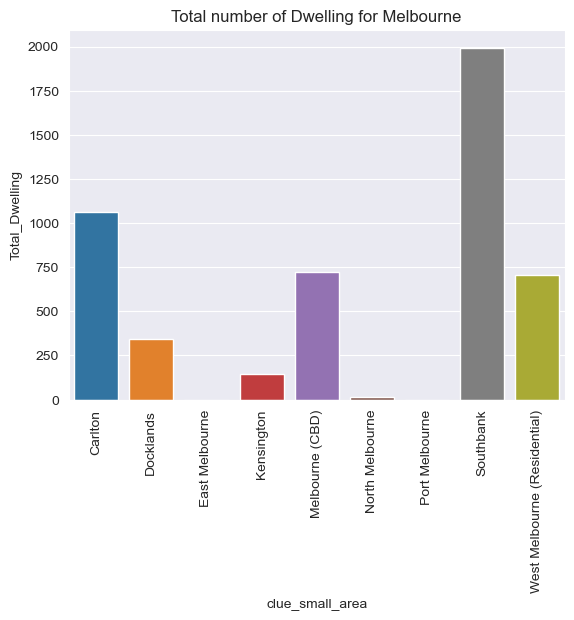

The Percentage of growth per suburb is displaying below:

                clue_small_area  Percentage %
7                     Southbank         39.94
0                       Carlton         21.33
4               Melbourne (CBD)         14.50
8  West Melbourne (Residential)         14.10
1                     Docklands          6.89
3                    Kensington          2.92
5               North Melbourne          0.32
2                East Melbourne          0.00
6                Port Melbourne          0.00


In [14]:
graph_dwelling(dwelling)

In [15]:
def graph_cafe(data):
    '''
        using seaborn to visualise the dwelling data
    '''
    ax = sns.barplot(
    y='number_of_seats',
    x = 'clue_small_area',
    data = data
    
        )
    warnings.filterwarnings('ignore')
    sns.set_style("darkgrid")
    plt.xticks(rotation =90)
    plt.show()
    
    total = np.array(data['number_of_seats'].sum())
    data['Percentage %']= np.round((data['number_of_seats']/total)*100,2)
    temp =data.loc[:,['clue_small_area','Percentage %']]
    
    print('The Percentage of cafe in each area:')
    print()
    print(temp.sort_values(by='Percentage %',ascending = True))
    

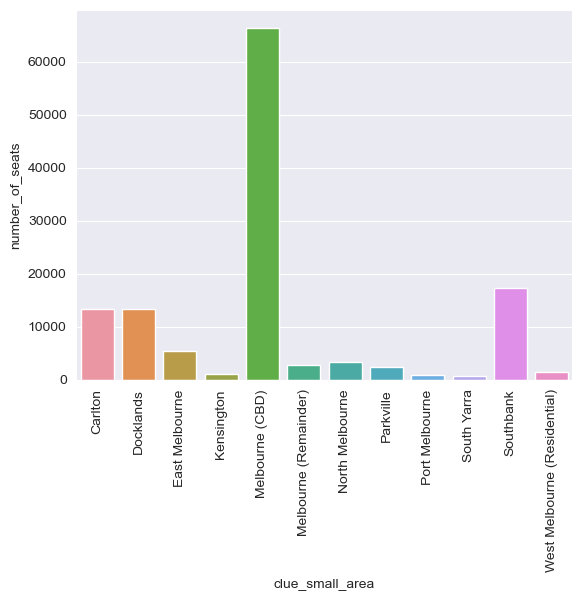

The Percentage of cafe in each area:

                 clue_small_area  Percentage %
9                    South Yarra          0.53
8                 Port Melbourne          0.73
3                     Kensington          0.81
11  West Melbourne (Residential)          1.06
7                      Parkville          1.83
5          Melbourne (Remainder)          2.16
6                North Melbourne          2.53
2                 East Melbourne          4.24
0                        Carlton         10.37
1                      Docklands         10.46
10                     Southbank         13.42
4                Melbourne (CBD)         51.85


In [16]:
graph_cafe(final)

## Observations:
- From the two gaph above, South bank and Carlton stands out as area of growth for 2022. 
- From the second bar, South bank and Carlton stands out once more as the a potential for a new cafe 
due to the low number of cafe present combared to the wider Melbourne.

## Merging the two dataset to obtain new information.
- Producing a table containing the number of seat / dwelling for each suburb.
- Drop the rows:  'Melbourne(remainder),Parkville , South Yarra they are missing in the Dwelling data set.


In [18]:
final.head(3)

,clue_small_area,industry_anzsic4_description,number_of_seats,longitude,latitude,Percentage %
0,Carlton,Cafes and Restaurants,13294,144.966085,-37.800992,10.37
1,Docklands,Cafes and Restaurants,13407,144.945594,-37.818142,10.46
2,East Melbourne,Cafes and Restaurants,5429,144.981429,-37.812974,4.24


In [19]:
final =final.drop([5,7,9])

In [20]:
final = final.sort_values('clue_small_area').reset_index(drop = True)

In [21]:
dwelling.sort_values('clue_small_area')

,index,clue_small_area,year,Total_Dwelling,Percentage %
0,20,Carlton,2022-01-01,1065,21.33
1,41,Docklands,2022-01-01,344,6.89
2,55,East Melbourne,2022-01-01,0,0.00
3,74,Kensington,2022-01-01,146,2.92
4,96,Melbourne (CBD),2022-01-01,724,14.50
5,127,North Melbourne,2022-01-01,16,0.32
6,164,Port Melbourne,2022-01-01,0,0.00
7,190,Southbank,2022-01-01,1994,39.94
8,218,West Melbourne (Residential),2022-01-01,704,14.10


In [22]:
final['seat/Dwelling'] = np.round((final['number_of_seats']/dwelling['Total_Dwelling']),2)

In [23]:
final.sort_values('seat/Dwelling',ascending = True).head(10)

,clue_small_area,industry_anzsic4_description,number_of_seats,longitude,latitude,Percentage %,seat/Dwelling
8,West Melbourne (Residential),Cafes and Restaurants,1360,144.950661,-37.807716,1.06,1.93
3,Kensington,Cafes and Restaurants,1041,144.927706,-37.791884,0.81,7.13
7,Southbank,Cafes and Restaurants,17198,144.961741,-37.823605,13.42,8.62
0,Carlton,Cafes and Restaurants,13294,144.966085,-37.800992,10.37,12.48
1,Docklands,Cafes and Restaurants,13407,144.945594,-37.818142,10.46,38.97
4,Melbourne (CBD),Cafes and Restaurants,66452,144.963550,-37.813519,51.85,91.78
5,North Melbourne,Cafes and Restaurants,3247,144.951079,-37.802489,2.53,202.94
2,East Melbourne,Cafes and Restaurants,5429,144.981429,-37.812974,4.24,inf
6,Port Melbourne,Cafes and Restaurants,935,144.916663,-37.825455,0.73,inf


## Visualising using folium

In [24]:
m = folium.Map([-37.8105, 144.9624], zoom_start=13)
for index, row in final.iterrows():
    if row['seat/Dwelling'] >= 150:
        marker_color = 'darkred'
        fill_color = 'darkred'
        
    elif row['seat/Dwelling'] >= 100:
        marker_color = 'darkred'
        fill_color = 'red'
    elif row['seat/Dwelling'] >= 50:
        marker_color = 'darkred'
        fill_color = 'lightred'
    elif row['seat/Dwelling'] >= 10:
        marker_color = 'darkred'
        fill_color = 'orange'
    else:
        marker_color='darkred'
        fill_color = 'darkpurple'

        
    folium.Circle(
              location=[row['latitude'], row['longitude']],
              popup= 'Clients:' +str(row['seat/Dwelling']),
              tooltip=row['clue_small_area'],
              radius=row['seat/Dwelling']*10,
              color=marker_color,
              fill=True,
              fill_color=fill_color,
           ).add_to(m)
m

In [25]:
n = folium.Map([-37.8105, 144.9624], zoom_start=11)
locations =list(zip(final['latitude'],final['longitude']))
cluster = plugins.MarkerCluster(locations =locations,
                               popus =final['seat/Dwelling'].tolist())
n.add_child(cluster)

In [26]:
f =folium.Map([-37.8105, 144.9624], zoom_start=13)
for index, row in final.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                      popup=row['clue_small_area'],
                      tooltip=[row['clue_small_area'], row['seat/Dwelling']]           
                 ).add_to(f)

        
f

# References:
    - https://www.linkedin.com/pulse/mapping-australian-geograph-data-python-dilan-jayasekara/
    - https://python-graph-gallery.com/312-add-markers-on-folium-map/